In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

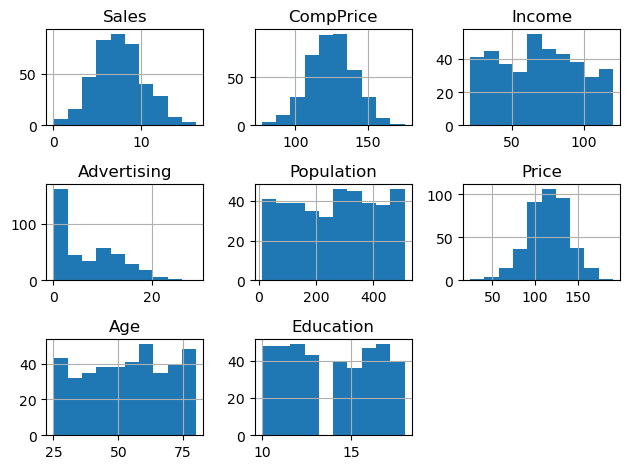

In [6]:
df.hist()
plt.tight_layout()

In [7]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [8]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [9]:
oe=OrdinalEncoder()
col_sel=df.select_dtypes(include='object').columns
df[col_sel]=oe.fit_transform(df[col_sel])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0


In [10]:
# oe=OrdinalEncoder()
# col_sel=df.select_dtypes(include='object')
# oe_col=oe.fit_transform(col_sel)
# oe_col=pd.DataFrame(oe_col)
# oe_col

In [11]:
# df['ShelveLoc']=oe_col[0]
# df['Urban']=oe_col[1]
# df['US']=oe_col[2]
# df

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    float64
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    float64
 10  US           400 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 34.5 KB


# Target column is sale according to problem statem(we will first convert it in categorical variable)

In [13]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


<AxesSubplot:>

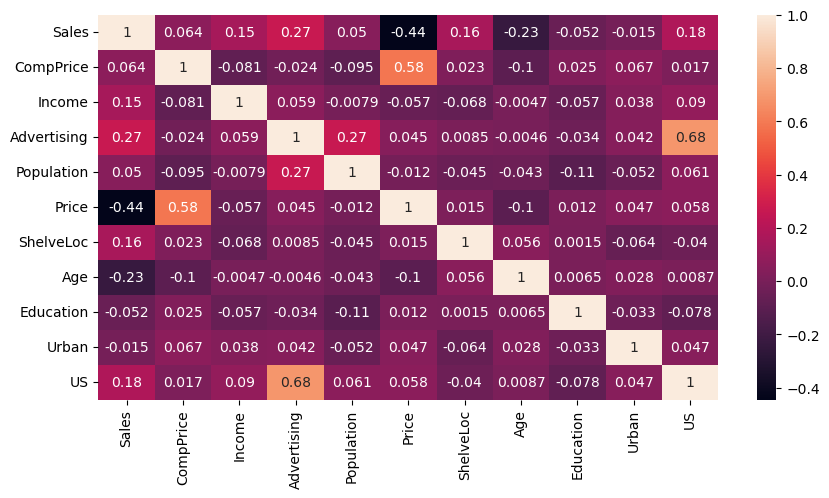

In [14]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(df.corr(),annot=True)

In [15]:
df["sales"]="Bad"
df.loc[df["Sales"]>7.49,"sales"]="Good"
df.drop(["Sales"],axis=1,inplace=True)

In [16]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0.0,42,17,1.0,1.0,Good
1,111,48,16,260,83,1.0,65,10,1.0,1.0,Good
2,113,35,10,269,80,2.0,59,12,1.0,1.0,Good
3,117,100,4,466,97,2.0,55,14,1.0,1.0,Bad
4,141,64,3,340,128,0.0,38,13,1.0,0.0,Bad
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,33,14,1.0,1.0,Good
396,139,23,3,37,120,2.0,55,11,0.0,1.0,Bad
397,162,26,12,368,159,2.0,40,18,1.0,1.0,Bad
398,100,79,7,284,95,0.0,50,12,1.0,1.0,Bad


In [17]:
x=df.iloc[:,0:10]
y=df.loc[:,'sales']
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0.0,42,17,1.0,1.0
1,111,48,16,260,83,1.0,65,10,1.0,1.0
2,113,35,10,269,80,2.0,59,12,1.0,1.0
3,117,100,4,466,97,2.0,55,14,1.0,1.0
4,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,33,14,1.0,1.0
396,139,23,3,37,120,2.0,55,11,0.0,1.0
397,162,26,12,368,159,2.0,40,18,1.0,1.0
398,100,79,7,284,95,0.0,50,12,1.0,1.0


In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=2)

In [19]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         Bad       0.72      0.72      0.72        64
        Good       0.68      0.68      0.68        56

    accuracy                           0.70       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.70      0.70      0.70       120



In [21]:
confusion_matrix(ytest,ypred)

array([[46, 18],
       [18, 38]], dtype=int64)

In [22]:
dt.score(xtrain,ytrain),dt.score(xtest,ytest)

(1.0, 0.7)

In [23]:
dt.feature_importances_

array([0.15994517, 0.05852809, 0.11052199, 0.10955326, 0.32612397,
       0.03753976, 0.17651638, 0.02127136, 0.        , 0.        ])

In [24]:
pd.DataFrame({'features':xtrain.columns,
              'IG':dt.feature_importances_
             }).sort_values(by='IG',ascending=False)

,features,IG
4,Price,0.326124
6,Age,0.176516
0,CompPrice,0.159945
2,Advertising,0.110522
3,Population,0.109553
1,Income,0.058528
5,ShelveLoc,0.037540
7,Education,0.021271
8,Urban,0.000000
9,US,0.000000


# Hyperparameter

In [25]:
params = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,6,9,12,16],
    'min_samples_split':[2,4,5,6,8,10]
    }

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, verbose=-1)

In [28]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 9, 12, 16],
                         'min_samples_split': [2, 4, 5, 6, 8, 10],
                         'splitter': ['best', 'random']},
             verbose=-1)

In [29]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_split': 10,
 'splitter': 'random'}

In [30]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=9,splitter='random',min_samples_split=8)

In [31]:
dt1.fit(xtrain,ytrain)
ypred=dt1.predict(xtest)

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         Bad       0.77      0.75      0.76        64
        Good       0.72      0.75      0.74        56

    accuracy                           0.75       120
   macro avg       0.75      0.75      0.75       120
weighted avg       0.75      0.75      0.75       120



In [33]:
dt1.score(xtrain,ytrain),dt1.score(xtest,ytest)

(0.875, 0.75)

In [34]:
dt1.feature_importances_

array([0.09910854, 0.06373675, 0.05928911, 0.05614656, 0.29254607,
       0.18954276, 0.02258513, 0.05991809, 0.08252029, 0.07460669])

In [35]:
pd.DataFrame({'features':xtrain.columns,
              'IG':dt1.feature_importances_
             }).sort_values(by='IG',ascending=False)

,features,IG
4,Price,0.292546
5,ShelveLoc,0.189543
0,CompPrice,0.099109
8,Urban,0.082520
9,US,0.074607
1,Income,0.063737
7,Education,0.059918
2,Advertising,0.059289
3,Population,0.056147
6,Age,0.022585


In [36]:
from sklearn import tree

[Text(0.3114406779661017, 0.95, 'ShelveLoc <= 0.89\nentropy = 1.0\nsamples = 280\nvalue = [137, 143]\nclass = Bad'),
 Text(0.1228813559322034, 0.85, 'Price <= 125.75\nentropy = 0.84\nsamples = 67\nvalue = [49, 18]\nclass = Good'),
 Text(0.07627118644067797, 0.75, 'Price <= 70.238\nentropy = 0.95\nsamples = 46\nvalue = [29, 17]\nclass = Good'),
 Text(0.059322033898305086, 0.65, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Bad'),
 Text(0.09322033898305085, 0.65, 'Population <= 197.323\nentropy = 0.926\nsamples = 44\nvalue = [29, 15]\nclass = Good'),
 Text(0.05084745762711865, 0.55, 'Education <= 17.965\nentropy = 0.544\nsamples = 16\nvalue = [14, 2]\nclass = Good'),
 Text(0.03389830508474576, 0.45, 'Income <= 36.147\nentropy = 0.371\nsamples = 14\nvalue = [13, 1]\nclass = Good'),
 Text(0.01694915254237288, 0.35, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Good'),
 Text(0.05084745762711865, 0.35, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = Good'),
 Text(0.06779

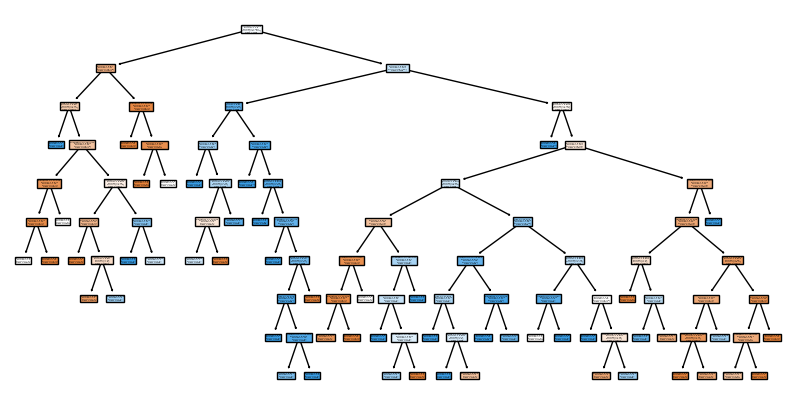

In [37]:
tree.plot_tree(dt1,feature_names=x.columns, class_names=df['sales'].unique(), filled=True)